In [1]:
%matplotlib inline
from IPython.display import display, Math
from sympy import Symbol, Function, diff, sin, cos, N
from sympy.solvers import solve
from sympy.plotting import plot
from mpmath import euler
import pandas as pd

# Some default values
TOL = 0.0005
MAX_ITER = 20
MAX_PRECISION = 8

def randomInitial(equation, num_range, sign, precision=MAX_PRECISION):
    """Generate initial value randomly.
        
    Args:
        - equation: math equation
        - num_range: the initial will between this range tuple
        - sign:
            - 0: generate positive number
            - 1: generate negative number
        - precision: round for floating number's precision
        
    Returns:
        float: Random initial value.
    """
    import random
    while True:
        n = random.uniform(num_range[0], num_range[1])
        fx = equation.subs(x, n)
        if sign == 0:
            if fx > 0:
                return N(n, precision)
        elif sign == 1:
            if fx < 0:
                return N(n, precision)


def bisection(equation, a, b, n=MAX_ITER, tol=TOL, precision=MAX_PRECISION, verbose=True):
    """ Bisection Method
    
    Args:
        - a: left endpoint
        - b: right endpoint
        - n: max iterations, default is 50
        - tol: stop when the length of the search interval is less than tolerance,
               default is 0.0005
        - precision: round for floating number's precision, default is 8
        - verbose: output some logs, default is True
    
    Returns:
        float: Root of the equation.
        list: Vaules during the Bisection Method.
    """
    data = []
    pn = 0
    for step in range(n):
        pn = a + (b - a) /2
        fpn = N(equation.subs(x, pn), precision)
        fan = N(equation.subs(x, a), precision)
    
        data.append([a, b, pn, fpn])
        
        if abs(fpn) < tol:
            break
        
        if fpn * fan < 0:
            b = pn
        else:
            a = pn
            
    if verbose:
        print("root is found at x = {:f}".format(pn))
    return pn, data


def falsePosition(equation, a, b, n=MAX_ITER, tol=TOL, precision=MAX_PRECISION, verbose=True):
    """ False Position Method
    
    Args:
        - a: left endpoint
        - b: right endpoint
        - n: max iterations, default is 50
        - tol: stop when the length of the search interval is less than tolerance,
               default is 0.0005
        - precision: round for floating number's precision, default is 8
        - verbose: output some logs, default is True
    
    Returns:
        float: Root of the equation.
        list: Vaules during the False Position Method.
    """
    data = []
    pn = 0
    
    for step in range(n):
        fa = N(equation.subs(x, a), precision)
        fb = N(equation.subs(x, b), precision)
        pn = N((a - (fa * (b - a)) / (fb - fa)), precision)
        fpn = N(equation.subs(x, pn), precision)
        
        data.append([a, b, pn, fpn])
        
        if abs(fpn) < tol:
            break
            
        if fa * fpn < 0:
            b = pn
        else:
            a = pn
            
    if verbose:
        print("root is found at x = {:f}".format(pn))
    return pn, data


def secant(equation, p0, p1, n=MAX_ITER, tol=TOL, precision=MAX_PRECISION, verbose=True):
    """ Bisection Method
    
    Args:
        - p0: left endpoint
        - p1: right endpoint
        - n: max iterations, default is 50
        - tol: stop when the length of the search interval is less than tolerance,
               default is 0.0005
        - precision: round for floating number's precision, default is 8
        - verbose: output some logs, default is True
    
    Returns:
        float: Root of the equation.
        list: Vaules during the Secant Method.
    """
    data = []
    pn = 0
    
    for step in range(n):
        fp0 = N(equation.subs(x, p0), precision)
        fp1 = N(equation.subs(x, p1), precision)
        pn = N(p1 - (fp1 * (p1 - p0)) / (fp1 - fp0), precision)
        fpn = N(equation.subs(x, pn), precision)
        
        data.append([pn, fpn])
        
        if abs(pn - p1) < tol:
            break
        
        p0 = p1
        p1 = pn
        
    if verbose:
        print("root is found at x = {:f}".format(pn))
    return pn, data
    

def newton(equation, p0, n=MAX_ITER, tol=TOL, precision=MAX_PRECISION, verbose=True):
    """ Newton's Method
    
    Args:
        - p0: start point
        - n: max iterations, default is 50
        - tol: stop when the length of the search interval is less than tolerance,
               default is 0.0005
        - precision: round for floating number's precision, default is 8
        - verbose: output some logs, default is True
    
    Returns:
        float: Root of the equation.
        list: Vaules during the Newton's Method.
    """
    data = []
    pn = 0
    equation_prime = diff(equation, x)
    
    for step in range(n):
        fp = N(equation.subs(x, p0), precision)
        fpp = N(equation_prime.subs(x, p0), precision)
        pn = N(p0 - (fp / fpp), precision)
        fpn = N(equation.subs(x, pn), precision)
        
        data.append([pn, fpn])
        
        if abs(pn - p0) < tol:
            break
        
        p0 = pn
        
        if step == n - 1 and verbose:
            print('Reach the max iterations: {:d}, stop calculating.'.format(n))
    if verbose:
        print("root is found at x = {:f}".format(pn))
    return pn, data

## 1. $f(x) = x^3 + 4x^2 - 10$ in the closed interval $[1, 2]$

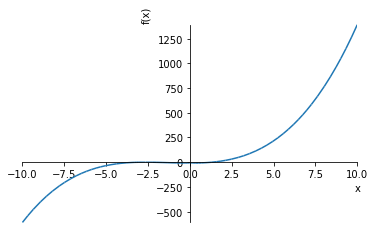

In [2]:
x = Symbol('x')
f = x**3 + 4 * x**2 - 10
plot(f)

### (a) Bisection Method

In [3]:
root, data = bisection(f, 1, 2)
table = pd.DataFrame(data, columns=['$a_{n}$', '$b_{n}$', '$p_{n}$', '$f(pn)$'])
table.index += 1
table

root is found at x = 1.365234


,$a_{n}$,$b_{n}$,$p_{n}$,$f(pn)$
1,1.000000,2.000000,1.500000,2.3750000
2,1.000000,1.500000,1.250000,-1.7968750
3,1.250000,1.500000,1.375000,0.16210938
4,1.250000,1.375000,1.312500,-0.84838867
5,1.312500,1.375000,1.343750,-0.35098267
6,1.343750,1.375000,1.359375,-0.096408844
7,1.359375,1.375000,1.367188,0.032355785
8,1.359375,1.367188,1.363281,-0.032149971
9,1.363281,1.367188,1.365234,7.2024763e-5


### (b) False Position Method

In [4]:
root, data = falsePosition(f, 1, 2)
table = pd.DataFrame(data, columns=['$a_{n}$', '$b_{n}$', '$p_{n}$', '$f(pn)$'])
table.index += 1
table

root is found at x = 1.3652033


,$a_{n}$,$b_{n}$,$p_{n}$,$f(pn)$
1,1,2,1.2631579,-1.6022744
2,1.2631579,2,1.3388278,-0.43036474
3,1.3388278,2,1.3585463,-0.11000878
4,1.3585463,2,1.3635474,-0.027762078
5,1.3635474,2,1.3648070,-0.0069834143
6,1.3648070,2,1.3651237,-0.0017551854
7,1.3651237,2,1.3652033,-0.00044105202


### (c) Secant Method

In [5]:
root, data = secant(f, 1, 2)
table = pd.DataFrame(data, columns=['$p_{n}$', '$f(p_{n})$'])
table.index += 2
table

root is found at x = 1.3652300


,$p_{n}$,$f(p_{n})$
2,1.2631579,-1.6022744
3,1.3388278,-0.43036474
4,1.3666164,0.022909418
5,1.3652119,-0.00029907376
6,1.3652300,-2.0116568e-7


### (d) Newton's Method

In [6]:
root, data = newton(f, 1)
table = pd.DataFrame(data, columns=['$p_{n}$', '$f(p_{n})$'])
table.index += 1
table

root is found at x = 1.3652300


,$p_{n}$,$f(p_{n})$
1,1.4545455,1.5401953
2,1.3689004,0.060719699
3,1.3652366,0.00010878593
4,1.3652300,-1.4901161e-8


## 2. $f(x) = e^x - 2cosx$ in the closed interval $[0, 2]$

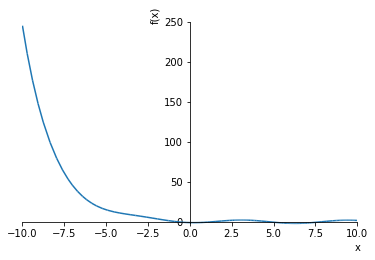

In [7]:
f = euler**x - 2 * cos(x)
plot(f)

### (a) Bisection Method

In [8]:
root, data = bisection(f, 0, 2)
table = pd.DataFrame(data, columns=['$a_{n}$', '$b_{n}$', '$p_{n}$', '$f(pn)$'])
table.index += 1
table

root is found at x = 1.327148


,$a_{n}$,$b_{n}$,$p_{n}$,$f(pn)$
1,0.000000,2.000000,1.000000,-0.50338895
2,1.000000,2.000000,1.500000,0.29706353
3,1.000000,1.500000,1.250000,-0.12752350
4,1.250000,1.500000,1.375000,0.080625501
5,1.250000,1.375000,1.312500,-0.024733230
6,1.312500,1.375000,1.343750,0.027655863
7,1.312500,1.343750,1.328125,0.0013848834
8,1.312500,1.328125,1.320312,-0.011693763
9,1.320312,1.328125,1.324219,-0.0051592773
10,1.324219,1.328125,1.326172,-0.0018883987


### (b) False Position Method

In [9]:
root, data = falsePosition(f, 0, 2)
table = pd.DataFrame(data, columns=['$a_{n}$', '$b_{n}$', '$p_{n}$', '$f(pn)$'])
table.index += 1
table

root is found at x = 1.3272542


,$a_{n}$,$b_{n}$,$p_{n}$,$f(pn)$
1,0,2,0.92358635,-0.60395553
2,0.92358635,2,1.2909968,-0.060413038
3,1.2909968,2,1.3259373,-0.0022813838
4,1.3259373,2,1.3272542,-7.4847378e-5


### (c) Secant Method

In [10]:
root, data = secant(f, 0, 2)
table = pd.DataFrame(data, columns=['$p_{n}$', '$f(p_{n})$'])
table.index += 2
table

root is found at x = 1.3272988


,$p_{n}$,$f(p_{n})$
2,0.92358635,-0.60395553
3,1.2909968,-0.060413038
4,1.3318333,0.0076062397
5,1.3272668,-5.3762708e-5
6,1.3272988,-4.5709608e-8


### (d) Newton's Method

In [11]:
root, data = newton(f, 2)
table = pd.DataFrame(data, columns=['$p_{n}$', '$f(p_{n})$'])
table.index += 1
table

root is found at x = 1.3272989


,$p_{n}$,$f(p_{n})$
1,1.2873915,-0.066364056
2,1.3276278,0.00055140471
3,1.3272989,3.5521020e-8


## 3. $f(x) = 4xcos(2x) - (x-2)^2$ has four roots in $[0, 8]$

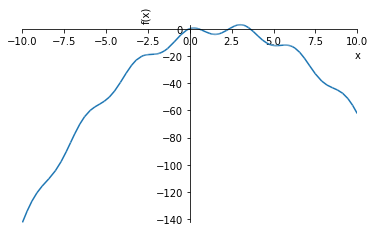

In [12]:
f = 4 * cos(2 * x) - (x - 2)**2
plot(f)

### Generate initial value randomly

In [13]:
a = randomInitial(f, (0, 8), 0)
b = randomInitial(f, (0, 8), 1)
display(Math('a = {}'.format(a)))
display(Math('b = {}'.format(b)))
display(Math('f(a) = {} > 0'.format(f.subs(x, a))))
display(Math('f(b) = {} < 0'.format(f.subs(x, b))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### (a) Bisection Method

In [14]:
root, data = bisection(f, a, b)
table = pd.DataFrame(data, columns=['$a_{n}$', '$b_{n}$', '$p_{n}$', '$f(pn)$'])
table.index += 1
table

root is found at x = 3.5866808


,$a_{n}$,$b_{n}$,$p_{n}$,$f(pn)$
1,0.063725913,6.7662072,3.4149666,1.4147492
2,3.4149666,6.7662072,5.0905869,-12.460984
3,3.4149666,5.0905869,4.2527767,-7.5007507
4,3.4149666,4.2527767,3.8338716,-2.6224307
5,3.4149666,3.8338716,3.6244191,-0.36321724
6,3.4149666,3.6244191,3.5196928,0.60032742
7,3.5196928,3.6244191,3.5720560,0.13557985
8,3.5720560,3.6244191,3.5982375,-0.10978259
9,3.5720560,3.5982375,3.5851467,0.013935935
10,3.5851467,3.5982375,3.5916921,-0.047667507


### (b) False Position Method

In [15]:
root, data = falsePosition(f, a, b)
table = pd.DataFrame(data, columns=['$a_{n}$', '$b_{n}$', '$p_{n}$', '$f(pn)$'])
table.index += 1
table

root is found at x = 0.47531590


,$a_{n}$,$b_{n}$,$p_{n}$,$f(pn)$
1,0.063725913,6.7662072,0.13457536,0.37617923
2,0.13457536,6.7662072,0.25440441,0.44619762
3,0.25440441,6.7662072,0.39350122,0.24304757
4,0.39350122,6.7662072,0.46837818,0.023751970
5,0.46837818,6.7662072,0.47568709,-0.0012707934
6,0.46837818,0.47568709,0.47531590,1.4621764e-5


### (c) Secant Method

In [16]:
root, data = secant(f, a, b)
table = pd.DataFrame(data, columns=['$p_{n}$', '$f(p_{n})$'])
table.index += 2
table

root is found at x = 0.000000022428210


,$p_{n}$,$f(p_{n})$
2,0.13457536,0.37617923
3,0.25440441,0.44619762
4,-0.50921543,-4.1973525
5,0.18102836,0.43202343
6,0.11661331,0.34455750
7,-0.13713908,-0.71687960
8,0.034241694,0.12641799
9,0.0085501541,0.033542685
10,-0.00072855766,-0.0029190108
11,1.4267363e-5,5.7071447e-5


### (d) Newton's Method

In [17]:
root, data = newton(f, b)
table = pd.DataFrame(data, columns=['$p_{n}$', '$f(p_{n})$'])
table.index += 1
table

root is found at x = 3.5866324


,$p_{n}$,$f(p_{n})$
1,5.4975552,-12.234748
2,17.672781,-248.45699
3,7.9953165,-39.785077
4,3.9186717,-3.6147516
5,3.6132747,-0.25438312
6,3.5870573,-0.0039925724
7,3.5866324,-1.0877848e-6


## 4. $f(x) = x^5 - 4.5x^4 + 4.55x^3 + 2.675x^2 -3.3x-1.3375$

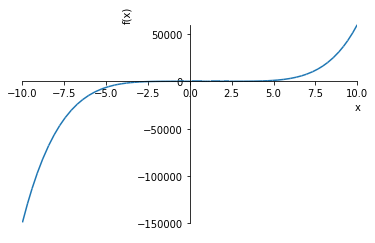

In [18]:
f = x**5 - 4.5*x**4 + 4.55*x**3 + 2.675*x**2 - 3.3*x - 1.3375
plot(f)

### (a) Secant Method using $p_{0} = -0.5,p_{1}=-0.4975,N=20$ and $TOL=10^{-5}$

In [19]:
root, data = secant(f, -0.5, -0.4975, tol=10**-5)
table = pd.DataFrame(data, columns=['$p_{n}$', '$f(p_{n})$'])
table.index += 2
table

root is found at x = -0.58581401


,$p_{n}$,$f(p_{n})$
2,2.8030791,5.8801494
3,-0.55455800,0.061165649
4,-0.58985146,-0.010195116
5,-0.58480918,0.0024529591
6,-0.58578707,6.6188269e-5
7,-0.58581419,-4.5023626e-7
8,-0.58581401,2.7939695e-10


### (b) Newton's Method using $p_{0}=-0.4975,N=20$ and $TOL=10^{-5}$

In [20]:
root, data = newton(f, 0.4975, tol=10**-5)
table = pd.DataFrame(data, columns=['$p_{n}$', '$f(p_{n})$'])
table.index += 1
table

root is found at x = 2.4891164


,$p_{n}$,$f(p_{n})$
1,2.9097745,9.8070279
2,2.6807210,2.7403269
3,2.5476161,0.60748870
4,2.4966420,0.068539981
5,2.4892622,0.0013026537
6,2.4891164,4.3679027e-7
7,2.4891164,-6.4261281e-8


## 5. Compare the Secant Method and Newton's Method for finding a root of each function below.
### (a) $F(x)=x^3-3x+1$, $p_{0}=2$

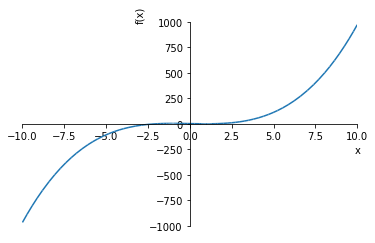

In [21]:
f = x**3 - 3 * x + 1
plot(f)

#### Newton's Method

In [22]:
root, data = newton(f, 2)
table = pd.DataFrame(data, columns=['$p_{n}$', '$f(p_{n})$'])
table.index += 1
table

root is found at x = 1.5320890


,$p_{n}$,$f(p_{n})$
1,1.6666667,0.62962963
2,1.5486111,0.068040214
3,1.5323902,0.0012181401
4,1.5320890,4.1723251e-7


#### Secant Method

In [23]:
root, data = secant(f, 2, data[0][0])
table = pd.DataFrame(data, columns=['$p_{n}$', '$f(p_{n})$'])
table.index += 2
table

root is found at x = 1.5320909


,$p_{n}$,$f(p_{n})$
2,1.5781250,0.19591141
3,1.5381305,0.024587721
4,1.5323907,0.0012203082
5,1.5320909,8.3297491e-6


### (b) $F(x)=x^3-2sinx$, $p_{0}=0.5$

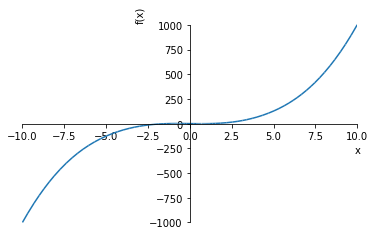

In [24]:
f = x**3 - 2 * sin(x)
plot(f)

#### Newton's Method

In [25]:
root, data = newton(f, 0.5)
table = pd.DataFrame(data, columns=['$p_{n}$', '$f(p_{n})$'])
table.index += 1
table

root is found at x = 0.000000000036379788


,$p_{n}$,$f(p_{n})$
1,-0.32956626,0.61146985
2,0.060769224,-0.12123924
3,-0.00030141784,0.00060283564
4,3.6379788e-11,-7.2759576e-11


#### Secant Method

In [26]:
root, data = secant(f, 2, data[0][0])
table = pd.DataFrame(data, columns=['$p_{n}$', '$f(p_{n})$'])
table.index += 2
table

root is found at x = 0.00000000000036770587


,$p_{n}$,$f(p_{n})$
2,-0.58530703,0.90439365
3,0.20428508,-0.39720902
4,-0.036674093,0.073282420
5,0.00085702864,-0.0017140565
6,-7.5114986e-7,1.5022997e-6
7,3.6770587e-13,-7.3541173e-13


## 6. $f(x)=x^5-9x^4-x^3+17x^2-8x-8$

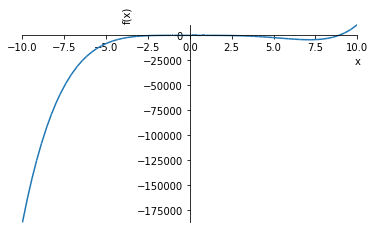

In [27]:
f = x**5-9*x**4-x**3+17*x**2-8*x-8
plot(f)

### Newton's Method using $p_{0}=0$

In [28]:
root, data = newton(f, 0)
table = pd.DataFrame(data, columns=['$p_{n}$', '$f(p_{n})$'])
table.index += 1
table

Reach the max iterations: 20, stop calculating.
root is found at x = 1.0000000


,$p_{n}$,$f(p_{n})$
1,-1.0000000,8.0000000
2,1.0000000,-8.0000000
3,0,-8.0000000
4,-1.0000000,8.0000000
5,1.0000000,-8.0000000
6,0,-8.0000000
7,-1.0000000,8.0000000
8,1.0000000,-8.0000000
9,0,-8.0000000
10,-1.0000000,8.0000000
